In [33]:
#상위 폴더 load_data파일 불러오기 위해 경로 추가
import sys
sys.path.append('../')  # 상위 폴더(main_folder)의 경로를 추가

# 데이터 가져오기
from load_data import *

# 텐서플로
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as Layer
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy

# 콜백
from timeit import default_timer as timer

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# 랜덤시드 고정
tf.random.set_seed(42)

In [11]:
# MinMaxScaler - 0, StandardScaler - 1, , MaxAbsScaler - 2, RobustScaler - 3, Normalizer - 4
X_train0, X_val0, X_test0, y_train0, y_val0, y_test0, scaler0  = load_data(scaler=0, upsampling=1)
X_train1, X_val1, X_test1, y_train1, y_val1, y_test1, scaler1  = load_data(scaler=1, upsampling=1)
X_train2, X_val2, X_test2, y_train2, y_val2, y_test2, scaler2  = load_data(scaler=2, upsampling=1)
X_train3, X_val3, X_test3, y_train3, y_val3, y_test3, scaler3  = load_data(scaler=3, upsampling=1)
X_train4, X_val4, X_test4, y_train4, y_val4, y_test4, scaler4  = load_data(scaler=4, upsampling=1)

X_train1.shape, X_val1.shape, X_test2.shape, y_train2.shape, y_val2.shape, y_test2.shape, scaler2



((1540, 20), (385, 20), (482, 20), (1540,), (385,), (482,), MaxAbsScaler())

In [19]:
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        print("Starting training")
        self.starttime = timer()

    def on_train_end(self, logs=None):
        print("End of training, took {} seconds".format(timer()-self.starttime))

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
          print("Epoch is {} and {} seconds passed".format(epoch, timer()-self.starttime))


def get_model(drop_rate = 0.1,check_path = 'model2.h5', epochs = 1000, batch_size=1024, validation_split=0.1):
  model = Sequential()
  model.add(Layer.Dense(12, activation = 'relu'))
  model.add(Layer.Dropout(0.1))

  model.add(Layer.Dense(4, activation = 'relu'))
  model.add(Layer.Dropout(0.1))


  model.add(Layer.Dense(6, activation = 'softmax'))

  metrics = [
      SparseCategoricalAccuracy(name = 'accuracy') # Accuracy를 사용 안 하는 이유는 Accuracy가 이상하세 나왔기 때문.
  ]

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss="sparse_categorical_crossentropy",
                 metrics=metrics)

  callback = [
    tf.keras.callbacks.EarlyStopping(monitor="loss",min_delta = 0.001, patience=100),
    tf.keras.callbacks.ModelCheckpoint(filepath=check_path, save_weights_only=True, monitor='loss', mode='min', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2, patience=100, min_lr=0.01),
    TimingCallback()
]

  history = model.fit(x=X_train0, y=y_train0, batch_size=batch_size,
                      epochs=epochs, shuffle=True,
                      validation_split=validation_split)

  return model

In [24]:
check_path = 'model.h5'

callback = [
    tf.keras.callbacks.EarlyStopping(monitor="loss",min_delta = 0.001, patience=100),
    tf.keras.callbacks.ModelCheckpoint(filepath=check_path, save_weights_only=True, monitor='loss', mode='min', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2, patience=100, min_lr=0.01),
    TimingCallback()
]

Epoch 1/1000
2/2 [==============================] - 0s 69ms/step - loss: 1.8151 - accuracy: 0.1205 - val_loss: 1.7904 - val_accuracy: 0.1688
Epoch 2/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.7894 - accuracy: 0.2121 - val_loss: 1.7959 - val_accuracy: 0.1104
Epoch 3/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.7877 - accuracy: 0.1991 - val_loss: 1.7825 - val_accuracy: 0.1948
Epoch 4/1000
2/2 [==============================] - 0s 14ms/step - loss: 1.7682 - accuracy: 0.2417 - val_loss: 1.7452 - val_accuracy: 0.2208
Epoch 5/1000
2/2 [==============================] - 0s 14ms/step - loss: 1.7318 - accuracy: 0.2554 - val_loss: 1.7213 - val_accuracy: 0.2078
Epoch 6/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.7154 - accuracy: 0.2179 - val_loss: 1.7008 - val_accuracy: 0.2013
Epoch 7/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.7035 - accuracy: 0.2439 - val_loss: 1.6830 - val_accuracy: 0.3117
Epoch 8/1000


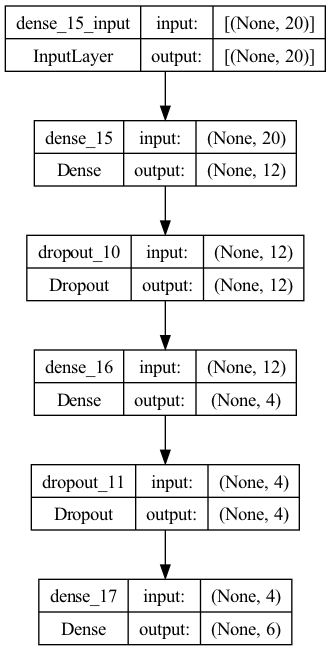

In [21]:
model = get_model()
keras.utils.plot_model(model, show_shapes=True)

In [35]:
history0 = model.fit(X_train0, y_train0, batch_size= 1024, epochs= 1000,  validation_data=(X_val0, y_val0), callbacks=callback,verbose = 0)
y_test_pred = model.predict(X_test0)
y_test_pred = np.argmax(y_test_pred, axis=-1)

cm = confusion_matrix(y_test0, y_test_pred)
cm = pd.DataFrame(cm)
cm.columns = ['Bumps', 'Dirtiness', 'K_Scatch', 'Pastry', 'Stains', 'Z_Scratch']
print(cm)
print(classification_report(y_test0, y_test_pred))

Starting training
Epoch is 0 and 0.04587512486614287 seconds passed
Epoch is 10 and 0.1805247499141842 seconds passed
Epoch is 20 and 0.322488916805014 seconds passed
Epoch is 30 and 0.4890545830130577 seconds passed
Epoch is 40 and 0.6232649169396609 seconds passed
Epoch is 50 and 0.7563566248863935 seconds passed
Epoch is 60 and 0.8847564999014139 seconds passed
Epoch is 70 and 1.0119193329010159 seconds passed
Epoch is 80 and 1.1381398749072105 seconds passed
Epoch is 90 and 1.269283541943878 seconds passed
Epoch is 100 and 1.3925144579261541 seconds passed
End of training, took 1.4302087079267949 seconds
16/16 [==============================] - 0s 347us/step
   Bumps  Dirtiness  K_Scatch  Pastry  Stains  Z_Scratch
0     48          7         1       8       4         13
1      0         82         0       0       0          1
2      9          0        64       4       0          3
3      7          3         0      58       0          5
4      0          0         0       0      8

In [37]:
history1 = model.fit(X_train1, y_train1, batch_size= 1024, epochs= 1000,  validation_data=(X_val1, y_val1), callbacks=callback,verbose = 0)
y_test_pred = model.predict(X_test1)
y_test_pred = np.argmax(y_test_pred, axis=-1)

cm = confusion_matrix(y_test1, y_test_pred)
cm = pd.DataFrame(cm)
cm.columns = ['Bumps', 'Dirtiness', 'K_Scatch', 'Pastry', 'Stains', 'Z_Scratch']
print(cm)
print(classification_report(y_test1, y_test_pred))

Starting training
Epoch is 0 and 0.025278375018388033 seconds passed
Epoch is 10 and 0.152612250065431 seconds passed
Epoch is 20 and 0.28506504208780825 seconds passed
Epoch is 30 and 0.4191584591753781 seconds passed
Epoch is 40 and 0.5571309591177851 seconds passed
Epoch is 50 and 0.6816005001310259 seconds passed
Epoch is 60 and 0.8085417090915143 seconds passed
Epoch is 70 and 0.9371430419851094 seconds passed
Epoch is 80 and 1.0774915420915931 seconds passed
Epoch is 90 and 1.206271959003061 seconds passed
Epoch is 100 and 1.3405832091812044 seconds passed
Epoch is 110 and 1.4669387501198798 seconds passed
Epoch is 120 and 1.5996215420309454 seconds passed
Epoch is 130 and 1.7282301250379533 seconds passed
Epoch is 140 and 1.855938667198643 seconds passed
Epoch is 150 and 1.9801049591042101 seconds passed
Epoch is 160 and 2.1085365421604365 seconds passed
Epoch is 170 and 2.2349797091446817 seconds passed
Epoch is 180 and 2.3745404169894755 seconds passed
Epoch is 190 and 2.50181

In [42]:
history2 = model.fit(X_train2, y_train2, batch_size= 1024, epochs= 1000,  validation_data=(X_val2, y_val2), callbacks=callback,verbose = 0)
y_test_pred = model.predict(X_test2)
y_test_pred = np.argmax(y_test_pred, axis=-1)

cm = confusion_matrix(y_test2, y_test_pred)
cm = pd.DataFrame(cm)
cm.columns = ['Bumps', 'Dirtiness', 'K_Scatch', 'Pastry', 'Stains', 'Z_Scratch']
print(cm)
print(classification_report(y_test2, y_test_pred))

Starting training
Epoch is 0 and 0.04342362517490983 seconds passed
Epoch is 10 and 0.18152591702528298 seconds passed
Epoch is 20 and 0.3223004590254277 seconds passed
Epoch is 30 and 0.44597654207609594 seconds passed
Epoch is 40 and 0.578534834086895 seconds passed
Epoch is 50 and 0.7244151670020074 seconds passed
Epoch is 60 and 0.8561744170729071 seconds passed
Epoch is 70 and 0.9917370839975774 seconds passed
Epoch is 80 and 1.1199831671547145 seconds passed
Epoch is 90 and 1.2450727501418442 seconds passed
Epoch is 100 and 1.3686686670407653 seconds passed
Epoch is 110 and 1.4889258341863751 seconds passed
Epoch is 120 and 1.6123568341135979 seconds passed
Epoch is 130 and 1.7343207921367139 seconds passed
Epoch is 140 and 1.858871917007491 seconds passed
Epoch is 150 and 1.983810625039041 seconds passed
Epoch is 160 and 2.1102495421655476 seconds passed
Epoch is 170 and 2.232792624970898 seconds passed
Epoch is 180 and 2.357968709198758 seconds passed
Epoch is 190 and 2.4832048

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [41]:
history01 = model.fit(X_train3, y_train3, batch_size= 1024, epochs= 1000,  validation_data=(X_val3, y_val3), callbacks=callback,verbose = 0)
y_test_pred = model.predict(X_test3)
y_test_pred = np.argmax(y_test_pred, axis=-1)

cm = confusion_matrix(y_test3, y_test_pred)
cm = pd.DataFrame(cm)
cm.columns = ['Bumps', 'Dirtiness', 'K_Scatch', 'Pastry', 'Stains', 'Z_Scratch']
print(cm)
print(classification_report(y_test3, y_test_pred))

Starting training
Epoch is 0 and 0.04396874993108213 seconds passed
Epoch is 10 and 0.18286520894616842 seconds passed
Epoch is 20 and 0.35930870892480016 seconds passed
Epoch is 30 and 0.4987312499433756 seconds passed
Epoch is 40 and 0.6336792919319123 seconds passed
Epoch is 50 and 0.7617287498433143 seconds passed
Epoch is 60 and 0.8914465419948101 seconds passed
Epoch is 70 and 1.0164580838754773 seconds passed
Epoch is 80 and 1.142595374956727 seconds passed
Epoch is 90 and 1.2674717500340194 seconds passed
Epoch is 100 and 1.3947627919260412 seconds passed
Epoch is 110 and 1.5178023339249194 seconds passed
Epoch is 120 and 1.6448575840331614 seconds passed
Epoch is 130 and 1.7716045000124723 seconds passed
Epoch is 140 and 1.900524624856189 seconds passed
Epoch is 150 and 2.0255139998625964 seconds passed
Epoch is 160 and 2.1507099999580532 seconds passed
Epoch is 170 and 2.2758706668391824 seconds passed
Epoch is 180 and 2.41073733381927 seconds passed
Epoch is 190 and 2.541875

In [40]:
history01 = model.fit(X_train4, y_train4, batch_size= 1024, epochs= 1000,  validation_data=(X_val4, y_val4), callbacks=callback,verbose = 0)
y_test_pred = model.predict(X_test4)
y_test_pred = np.argmax(y_test_pred, axis=-1)

cm = confusion_matrix(y_test4, y_test_pred)
cm = pd.DataFrame(cm)
cm.columns = ['Bumps', 'Dirtiness', 'K_Scatch', 'Pastry', 'Stains', 'Z_Scratch']
print(cm)
print(classification_report(y_test4, y_test_pred))

Starting training
Epoch is 0 and 0.04378641699440777 seconds passed
Epoch is 10 and 0.1762625421397388 seconds passed
Epoch is 20 and 0.3028554581105709 seconds passed
Epoch is 30 and 0.4243157079908997 seconds passed
Epoch is 40 and 0.5494802920147777 seconds passed
Epoch is 50 and 0.6718676669988781 seconds passed
Epoch is 60 and 0.7982687500771135 seconds passed
Epoch is 70 and 0.9231084580533206 seconds passed
Epoch is 80 and 1.050830125110224 seconds passed
Epoch is 90 and 1.18641662504524 seconds passed
Epoch is 100 and 1.3125228330027312 seconds passed
Epoch is 110 and 1.4458203751128167 seconds passed
Epoch is 120 and 1.5760630001313984 seconds passed
Epoch is 130 and 1.6996437080670148 seconds passed
Epoch is 140 and 1.8235830829944462 seconds passed
Epoch is 150 and 1.9479388750623912 seconds passed
Epoch is 160 and 2.0739214171189815 seconds passed
Epoch is 170 and 2.1982439579442143 seconds passed
Epoch is 180 and 2.322323667118326 seconds passed
Epoch is 190 and 2.44377270